 ## Guía de Trabajos Prácticos 1

# Librerías

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import sys

print("Python version %s / OpenCV version %s " %(sys.version,cv.__version__))

Python version 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0] / OpenCV version 4.8.0 


Activo mi entorno GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Ejercicio 1
1. Realice la carga y visualización de diferentes imágenes.

In [ ]:
# Carga

img_gray1 = cv.imread("/content/drive/My Drive/PDI/Paisaje.jpg",cv.IMREAD_GRAYSCALE) #escala de grises
img_color1 = cv.imread("/content/drive/My Drive/PDI/Paisaje.jpg") # color

img_gray2 = cv.imread("/content/drive/My Drive/PDI/Paisaje 2.jpg",cv.IMREAD_GRAYSCALE) #escala de grises
img_color2 = cv.imread("/content/drive/My Drive/PDI/Paisaje 2.jpg") # color

# Visualización con Opencv: esto no funciona en el entorno Colab, pero es util
# para hacer aplicaciones en PC.
# cv.imshow("Titulo 1",img1)
# cv.waitKey(0)
# cv.destroyAllWindows()

Podemos utilizar matplotlib, que nos permite graficar imágenes y dibujar gráficas. pyplot funciona de manera muy similar a matlab


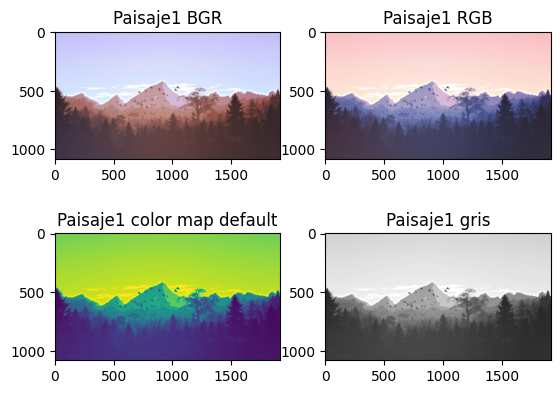

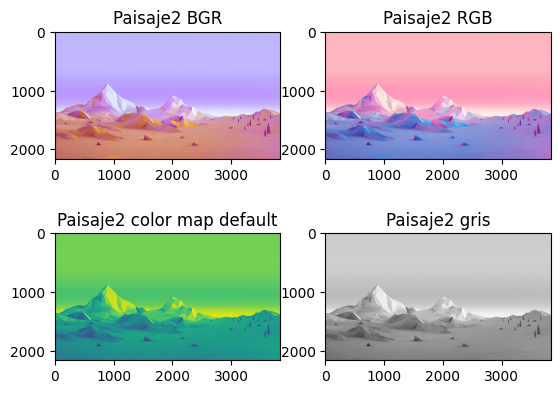

In [ ]:
#Visualización (Puse dos xq dice "de diferentes imágenes", de paso probé las cosas de color )
#Imagen 1
plt.figure(1)
plt.subplot(2, 2, 1)
plt.imshow(img_color1)
plt.title('Paisaje1 BGR')
plt.subplot(2, 2, 2)
plt.imshow(img_color1[:,:,[2,1,0]])
plt.title('Paisaje1 RGB')
plt.subplot(2, 2, 3)
plt.imshow(img_gray1)
plt.title('Paisaje1 color map default')
plt.subplot(2, 2, 4)
plt.imshow(img_gray1,cmap="gray",vmin=0,vmax=255)
plt.title('Paisaje1 gris')
plt.show()

#imagen 2
plt.figure(2)
plt.subplot(2, 2, 1)
plt.imshow(img_color2)
plt.title('Paisaje2 BGR')
plt.subplot(2, 2, 2)
plt.imshow(img_color2[:,:,[2,1,0]])
plt.title('Paisaje2 RGB')
plt.subplot(2, 2, 3)
plt.imshow(img_gray2)
plt.title('Paisaje2 color map default')
plt.subplot(2, 2, 4)
plt.imshow(img_gray2,cmap="gray",vmin=0,vmax=255)
plt.title('Paisaje2 gris')
plt.show()


2. Muestre en pantalla información sobre las imágenes.

In [ ]:
print("Valores de una esquina de la imagen 1 (2x2 pixeles):")
print(img_color1[:2, :2, :])
print()

print("Alto, ancho y n_canales = %s" %str(img_color1.shape))
print("Tipo de datos de imagen", img_color1.dtype)

print("valor medio %.3f, mínimo %d, máximo %d" %(np.mean(img_color1),
                                                 np.min(img_color1),
                                                 np.max(img_color1)))
print()
print()
print("Valores de una esquina de la imagen 2 (2x2 pixeles):")
print(img_color2[:2, :2, :])
print()

print("Alto, ancho y n_canales = %s" %str(img_color2.shape))
print("Tipo de datos de imagen", img_color2.dtype)

print("valor medio %.3f, mínimo %d, máximo %d" %(np.mean(img_color2),
                                                 np.min(img_color2),
                                                 np.max(img_color2)))



Valores de una esquina de la imagen 1 (2x2 pixeles):
[[[192 191 247]
  [192 191 247]]

 [[192 191 247]
  [192 191 247]]]

Alto, ancho y n_canales = (1080, 1920, 3)
Tipo de datos de imagen uint8
valor medio 156.592, mínimo 31, máximo 255


Valores de una esquina de la imagen 2 (2x2 pixeles):
[[[188 181 254]
  [188 181 254]]

 [[188 181 254]
  [188 181 254]]]

Alto, ancho y n_canales = (2160, 3840, 3)
Tipo de datos de imagen uint8
valor medio 188.299, mínimo 0, máximo 255


3. Investigue los formatos la imagen y como leer y como escribir un valor puntual de la imagen.


[194 192 252]
[196 193 249]
[194 192 252]


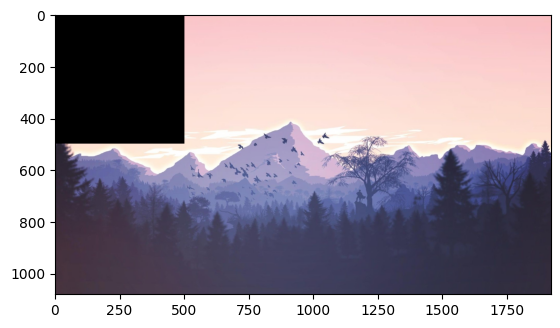

In [ ]:
imagen = img_color1.copy()

valor_px1 = imagen[10,20]
print(valor_px1)
print(imagen[20,10])
valor_px2 = imagen[20,10]
imagen[20,10] = valor_px1
print(imagen[20,10])

imagen[:500,:500] = [0,0,0]
plt.imshow(imagen[:,:,[2,1,0]])

4. Utilice el pasaje por parámetros para especificar la imagen a cargar. (esta escuché que dijeron algo en la clase pero no entendí)
5. Defina y recorte una subimagen de una imagen (vea ROI, Region Of Interest).

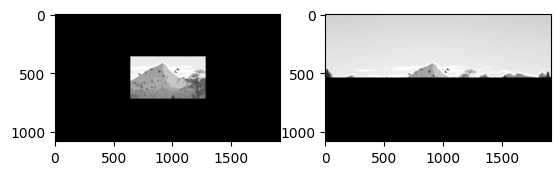

In [ ]:
# Podemos generar una mascara binaria para operar con imágenes.
mask = np.zeros(img_gray1.shape, dtype=img_gray1.dtype) # dtype: 'int8', bool, float, tener en cuenta el tipo de dato al realizar las operaciones

# Las imagenes son objetos y para hacer copias se debe tener en cuenta que el operador de asignación ("=") copia el puntero al objeto.
# Generamos una ROI con unos en la máscara
H, W = img_gray1.shape
mask[int(H/3):int(2*H/3),int(W/3):int(2*W/3)]=255 # Máscara rectangular

# operación AND pixel a pixel
img_recorte=cv.bitwise_and(img_gray1,mask)

mask2 = np.zeros(img_gray1.shape, dtype=img_gray1.dtype)

# Prueba2
mask2[0:int(H/2),0:W]=255 # Máscara mitad

img_recorte2=cv.bitwise_and(img_gray1,mask2)

plt.subplot(1, 2, 1)
plt.imshow(img_recorte,cmap="gray",vmin=0,vmax=255)

plt.subplot(1, 2, 2)
plt.imshow(img_recorte2,cmap="gray",vmin=0,vmax=255)
plt.show()

6. Investigue y realice una función que le permita mostrar varias imágenes en
una sola ventana. (supongo que esta es para cv.imgshow)
7. Dibuje sobre la imagen líneas, círculos y rectángulos (opcional: defina la posición en base al click del mouse).

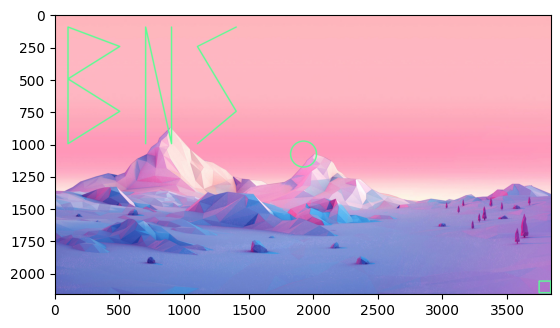

In [ ]:
# info img2 Alto, ancho y n_canales = (2160, 3840, 3)
img2 = img_color2.copy()

cv.line(img2, (100,100), (100,1000), (147,255,90), 10)
cv.line(img2, (100,100), (500,250), (147,255,90), 10)
cv.line(img2, (500,250), (100,500), (147,255,90), 10)
cv.line(img2, (100,500), (500,750), (147,255,90), 10)
cv.line(img2, (500,750), (100,1000), (147,255,90), 10)

cv.line(img2, (700,100), (700,1000), (147,255,90), 10)
cv.line(img2, (700,100), (900,1000), (147,255,90), 10)
cv.line(img2, (900,1000), (900,100), (147,255,90), 10)

cv.line(img2, (1400,100), (1100,250), (147,255,90), 10)
cv.line(img2, (1100,250), (1400,750), (147,255,90), 10)
cv.line(img2, (1400,750), (1100,1000), (147,255,90), 10)

cv.circle(img2, (1920, 1080), 100,(147,255,90), 10)

cv.rectangle(img2, (3740,2060), (3830,2150), (147,255,90), 10)

plt.imshow(img2[:,:,[2,1,0]])

# Ejercicio 2

In [ ]:
img_gray = cv.imread("/content/drive/My Drive/PDI/camino.tif",cv.IMREAD_GRAYSCALE)

# OBTENGO PERFIL DE INTENSIDAD PARA PUNTO DE UNA IMAGEN
x=200
y=200
i = img_gray[x,y]

print(f"Intensidad en el punto ({x},{y}): {i}")

Intensidad en el punto (200,200): 234


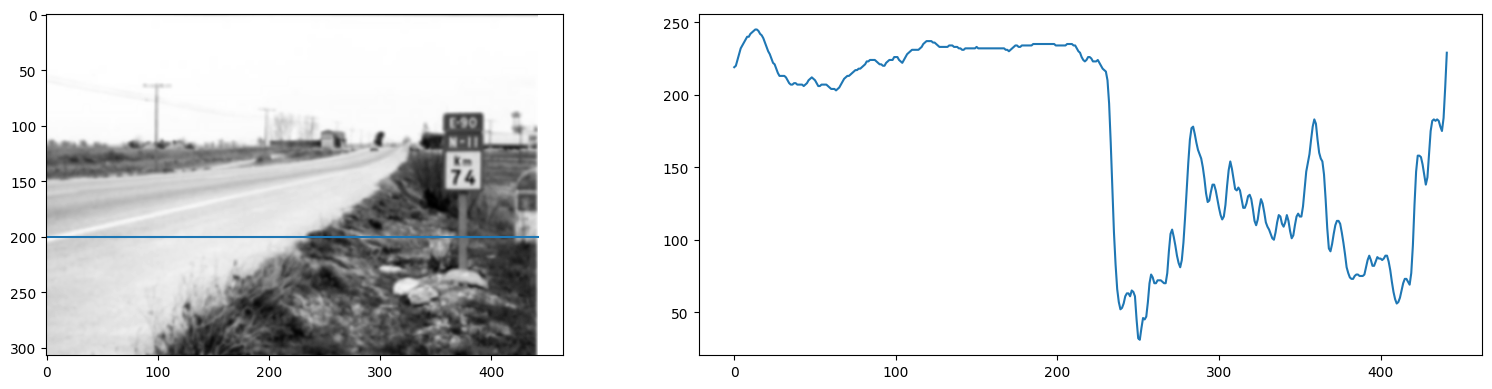

In [ ]:
# GRAFICO PERFIL DE INTENSIDAD PARA FILA DE UNA IMAGEN
fila=200
fig,ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(16)
ax[0].imshow(img_gray,cmap='gray')
ax[0].plot([0,img_gray.shape[1]],[fila,fila])
ax[1].plot(img_gray[fila,:])
plt.tight_layout()
plt.show()

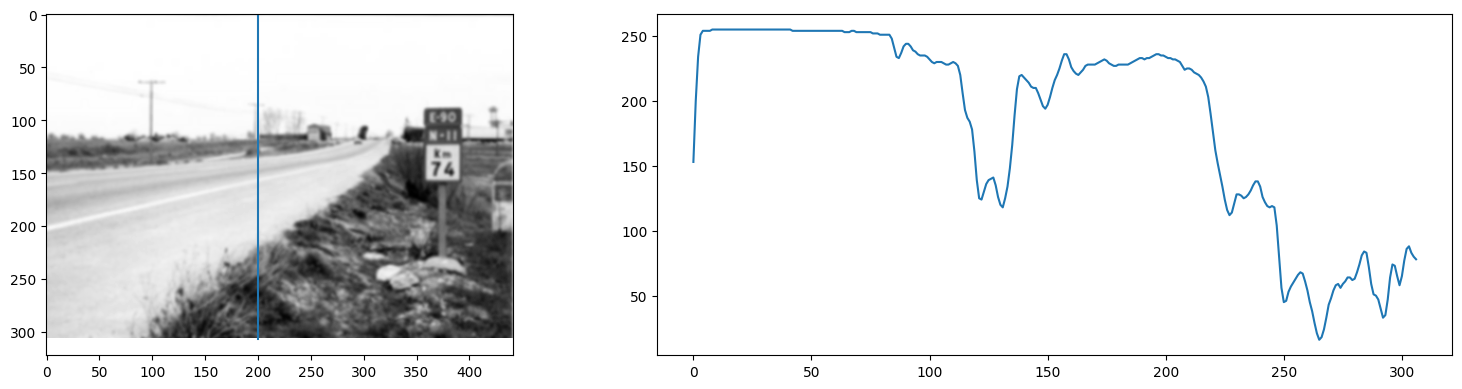

In [ ]:
# GRAFICO PERFIL DE INTENSIDAD PARA COLUMNA DE UNA IMAGEN
columna=200
fig,ax = plt.subplots(1,2, figsize=(16,4))
ax[0].imshow(img_gray,cmap='gray')
ax[0].plot([columna,columna],[img_gray.shape[0],0])
ax[1].plot(img_gray[:,columna])
plt.tight_layout()
plt.show()

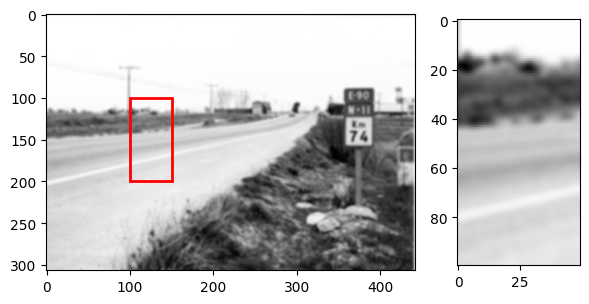

In [ ]:
# GRAFICO PERFIL DE INTENSIDAD PARA ROI (REGION DE INTERÉS) DE UNA IMAGEN

x = 100
y = 100
w = 50
h = 100

fig,ax = plt.subplots(1,2,figsize=(6,4),width_ratios=(3,1))
fig.set_figheight(4)
ax[0].imshow(img_gray,cmap='gray')
ax[0].add_patch(plt.Rectangle((x,y), w, h, edgecolor='red', linewidth=2, fill=False))

roi = img_gray[y:y+h,x:x+w]
ax[1].imshow(roi,cmap='gray')
plt.tight_layout()
plt.show()

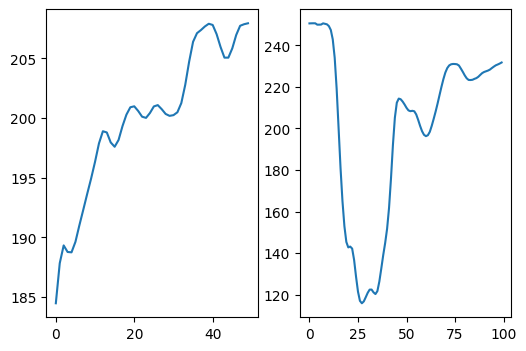

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(6,4))
intensity_profile_hor = np.mean(roi, axis=0)  # promedio horizontal
ax[0].plot(intensity_profile_hor)

intensity_profile_ver = np.mean(roi, axis=1)  # promedio vertical
ax[1].plot(intensity_profile_ver)

# Ejercicio 3:

Dimensiones:  (196, 285, 3)


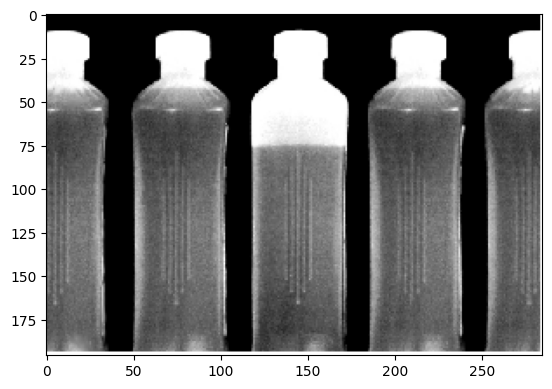

In [ ]:
im_normal = cv.imread("/content/drive/My Drive/PDI/botellas.tif")
im_grises = cv.imread("/content/drive/My Drive/PDI/botellas.tif", cv.IMREAD_GRAYSCALE)
print("Dimensiones: ", im_normal.shape)
plt.imshow(im_normal)
plt.show()

Valor máximo en escala de grises:  255
Valor mínimo en escala de grises:  0
Valor promedio en escala de grises:  92.35744718940208


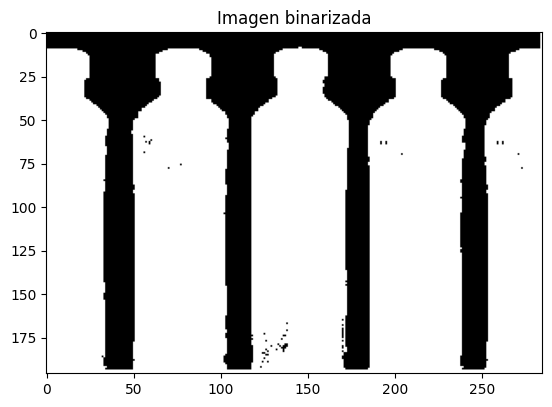

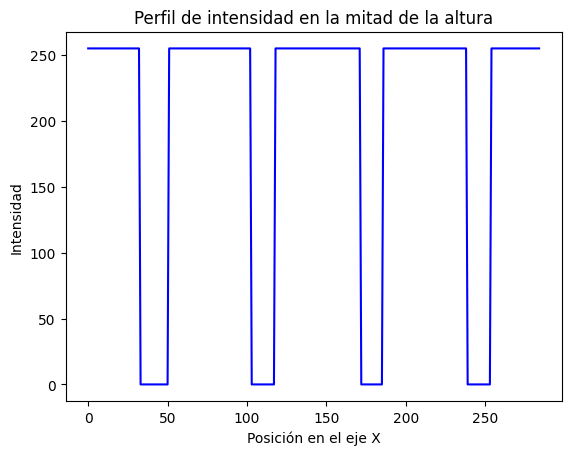

In [ ]:
# Data para conocer la imagen
max_grey = np.max(im_grises)
min_grey = np.min(im_grises)
avg_grey = np.mean(im_grises)
print("Valor máximo en escala de grises: ", max_grey)
print("Valor mínimo en escala de grises: ", min_grey)
print("Valor promedio en escala de grises: ", avg_grey)

# Umbral para binarizar la imagen
umbral = 50

# Hace negro cualquier pixel que esté por arriba del umbral y blanco si esta por debajo
im_binarizada = np.where(im_grises > umbral, 255, 0).astype(np.uint8)

plt.imshow(im_binarizada, cmap='gray')
plt.title("Imagen binarizada")
plt.show()

# Genera el perfil de intensidad en la mitad de la altura de la imagen
mitad_altura = im_binarizada.shape[0] // 2
perfil_intensidad = im_binarizada[mitad_altura, :]

# Graficar el perfil de intensidad
plt.plot(perfil_intensidad, color='blue')
plt.title("Perfil de intensidad en la mitad de la altura")
plt.xlabel("Posición en el eje X")
plt.ylabel("Intensidad")
plt.show()

In [ ]:
intervalos_botellas = []
inicio_is_set = False
inicio = -1

# Rellena el vector intervalo botellas con una serie de pares que indican donde
# empieza y donde termina una botella. En caso de que sólo se vieran pocos
# pixeles de la botella luego trata de sacar el centro entre estas 2 coordenadas
# lo cual en general no esta bueno
# debería ser un caso a tener en cuenta para corregir
for i in range(len(perfil_intensidad)):
    if perfil_intensidad[i] == 255 and inicio_is_set == False:
        inicio_is_set = True
        inicio = i
    elif perfil_intensidad[i] == 0 and inicio_is_set == True:
        intervalos_botellas.append([inicio, i-1])
        inicio_is_set = False
        inicio = -1

if inicio_is_set == True:
    intervalos_botellas.append([inicio, len(perfil_intensidad) - 1])
    print(intervalos_botellas)# Data para conocer un poco la imagen

[[0, 32], [51, 102], [118, 171], [186, 238], [254, 284]]


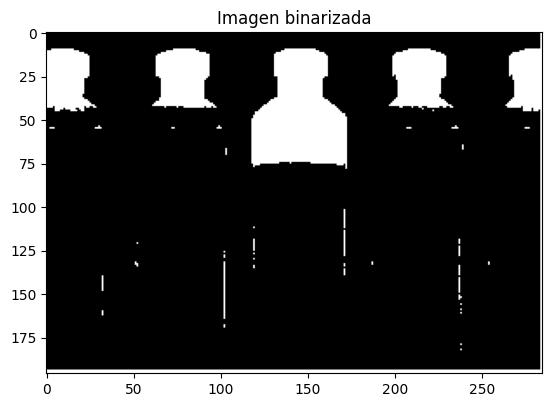

[44, 41, 73, 41, 42]


In [ ]:
# Definir el umbral para binarizar la imagen
umbral = 200
im_bin_nivel = np.where(im_grises > umbral, 255, 0).astype(np.uint8)

# Mostrar la imagen binarizada
plt.imshow(im_bin_nivel, cmap='gray')
plt.title("Imagen binarizada")
plt.show()

nivel_agua_botellas = []

for botella in intervalos_botellas:
    inicio = botella[0]
    fin = botella[1]
    centro = (inicio + fin) // 2

    nivel_agua = -1
    ceros_seguidos = 0 # Para asegurar que no sea algun pixel blanco medio random se cuentan 3 seguidos
    for i in range(im_bin_nivel.shape[0]):
       # print(im_bin_nivel.shape[0]-i-1, centro ,im_bin_nivel[im_bin_nivel.shape[0]-i-1][centro])
        if im_bin_nivel[im_bin_nivel.shape[0]-i-1][centro] == 255:  # Si encontramos un píxel negro
            ceros_seguidos += 1
        else:
            ceros_seguidos = 0
        if ceros_seguidos == 3:
            nivel_agua = im_bin_nivel.shape[0] - i  # Sumamos 2 para obtener el nivel en el píxel más bajo

    nivel_agua_botellas.append(nivel_agua)

print(nivel_agua_botellas)

In [ ]:
# Teniendo los niveles de cada botella a mano, armamos la salida para el problema.

nivel_max = 40  # aproximadamente en el nivel 40 de arriba para abajo se llenan las botellas
nivel_min = im_bin_nivel.shape[0] # 196

for i, nivel in enumerate(nivel_agua_botellas):
  porcentaje = (nivel - nivel_min)/(nivel_max - nivel_min)*100
  if(porcentaje < 95):  # umbral arbitrario para determinar si está llena o no
    print(f"La botella nº{i} no está llena. Nivel de llenado: {np.round(porcentaje,2)}%")
  else:
    print(f"La botella nº{i} está llena. Nivel de llenado: {np.round(porcentaje,2)}%")

La botella nº0 está llena. Nivel de llenado: 97.44%
La botella nº1 está llena. Nivel de llenado: 99.36%
La botella nº2 no está llena. Nivel de llenado: 78.85%
La botella nº3 está llena. Nivel de llenado: 99.36%
La botella nº4 está llena. Nivel de llenado: 98.72%
